
Temperature: 19.5 C
Pressure:1010.9 hPa
Altitude = 19.38 meters

Temperature: 19.6 C
Pressure:1010.9 hPa
Altitude = 19.42 meters

Temperature: 19.5 C
Pressure:1010.9 hPa
Altitude = 19.32 meters

Temperature: 21.8 C
Pressure:1011.0 hPa
Altitude = 19.31 meters

Temperature: 21.1 C
Pressure:1010.9 hPa
Altitude = 19.07 meters

Temperature: 20.8 C
Pressure:1010.9 hPa
Altitude = 19.52 meters

Temperature: 20.7 C
Pressure:1010.9 hPa
Altitude = 19.53 meters

Temperature: 20.5 C
Pressure:1010.9 hPa
Altitude = 19.48 meters

Temperature: 20.5 C
Pressure:1011.0 hPa
Altitude = 19.14 meters

Temperature: 22.7 C
Pressure:1010.9 hPa
Altitude = 19.37 meters

Temperature: 25.5 C
Pressure:1011.0 hPa
Altitude = 19.09 meters

Temperature: 26.9 C
Pressure:1011.0 hPa
Altitude = 19.05 meters

Temperature: 27.7 C
Pressure:1011.0 hPa
Altitude = 18.83 meters

Temperature: 28.4 C
Pressure:1011.0 hPa
Altitude = 18.20 meters

Temperature: 28.9 C
Pressure:1011.0 hPa
Altitude = 18.65 meters

Temperature: 29.4 C
Pres

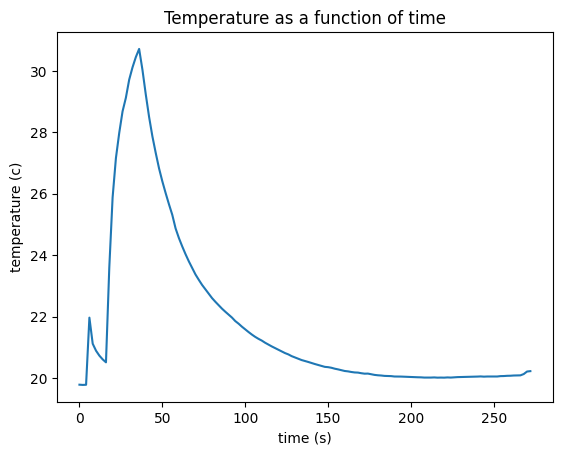

In [1]:
#requires installing adafruit-circuitpython-bmp280 library and gpiozero; implementation of plotting to be added
#Data: Includes full range of fan capacity (30> and <20 degrees Celcius responses)

from time import sleep
import board
import adafruit_bmp280
from gpiozero import Motor
from matplotlib import pyplot as plt

i2c = board.I2C()
bmp280 = adafruit_bmp280.Adafruit_BMP280_I2C(i2c,address=0x76)
mot = Motor(forward = 18, backward = 19, enable = 17, pwm = True)
x=[]
y=[]

bmp280.sea_level_pressure = 1013.25

def get_temp():
    try:
        return bmp280.temperature
    except OSError:
        print("Sensor glitch")
        sleep(.1)
        return None

def loop():
    count = 0
    while True:
        print("\nTemperature: %0.1f C"%bmp280.temperature)
        print("Pressure:%0.1f hPa" % bmp280.pressure)
        print("Altitude = %0.2f meters" % bmp280.altitude)
        if bmp280.temperature > 30:
            mot.forward(1)
        elif bmp280.temperature >25:
            mot.forward(.8)
        elif bmp280.temperature > 20:
            mot.forward(1)
            sleep(.2)
            mot.forward(.5)
        else:
            mot.forward(0)
        temp = get_temp()
        if temp is None:
            continue
        y.append(temp)
        x.append(count)
        sleep(2)
        count+=2

if __name__ == "__main__":
    try:
        loop()
    except KeyboardInterrupt:
        print("end")
        plt.plot(x,y)
        plt.xlabel("time (s)")
        plt.ylabel("temperature (c)")
        plt.title("Temperature as a function of time")
        plt.show()
        i2c.deinit()
        mot.close()